In [ ]:
#github reporcitary link
https://github.com/BinethBasilu/DSPL_Tute_7/blob/main/DSPL_T7.ipynb

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#access the local file using python code
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


TASK 1

In [3]:
df_d = pd.read_csv('diabetes.csv')
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


TASK 2

In [4]:
# Calculate the median blood pressure for people diagnosed with diabetes.
median_blood_pressure = df_d[df_d['Outcome'] == 1]['BloodPressure'].median()
print(f"The median blood pressure for people diagnosed with diabetes is: {median_blood_pressure}")

The median blood pressure for people diagnosed with diabetes is: 74.0


TASK 3

In [5]:
df_d['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


The dataset is not balanced as there is way more individuals not diagnosed with diabetes

TASK 4

In [6]:
X = df_d.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
Y = df_d['Outcome']
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


TASK 5

TASK 6

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=43, stratify=Y)

TASK 7

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt_d = DecisionTreeClassifier()
dt_d.fit(X_train, Y_train)

DecisionTreeClassifier()

In [10]:
from sklearn.metrics import accuracy_score
Y_pred = dt_d.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.65625

This model has an accuracy of 67%, which is decent but leaves room for improvement. While it can predict a patient's likelihood of having diabetes with 67% accuracy, this is relatively low for health-related decisions where higher reliability is crucial.

TASK 8

In [11]:

from sklearn.metrics import accuracy_score
Y_train_pred = dt_d.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

1.0

In [12]:
from sklearn.metrics import accuracy_score
Y_test_pred = dt_d.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.65625

It's only giving accuracy level of 67% on test.

TASK 9

Basically precision is the measurement that gives  how many of the predicted positive cases were actually correct. According to the case scenario, 77% of predicted class 0 cases were actually 0. 71% of predicted class 1 cases were actually 1.

Recall gives the how many actual positive cases were correctly identified. According to given scenario,89% of actual class 0 cases were correctly identified. 50% of actual class 1 cases were correctly identified.

TASK 10

In [13]:
#Create a confusion matrix to analyse the performance of the DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[93, 32],
       [34, 33]])

The true negatives(93) and true positive(33) are higher than the false negative(34) and false positive(32). This model is sensitive predectind diabetic.

In [14]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       125
           1       0.51      0.49      0.50        67

    accuracy                           0.66       192
   macro avg       0.62      0.62      0.62       192
weighted avg       0.65      0.66      0.66       192



but according to this above report recall is less than 50% So, we can't say it's good model because this case is a sensitive scenario.(related to medical side)

TASK 11

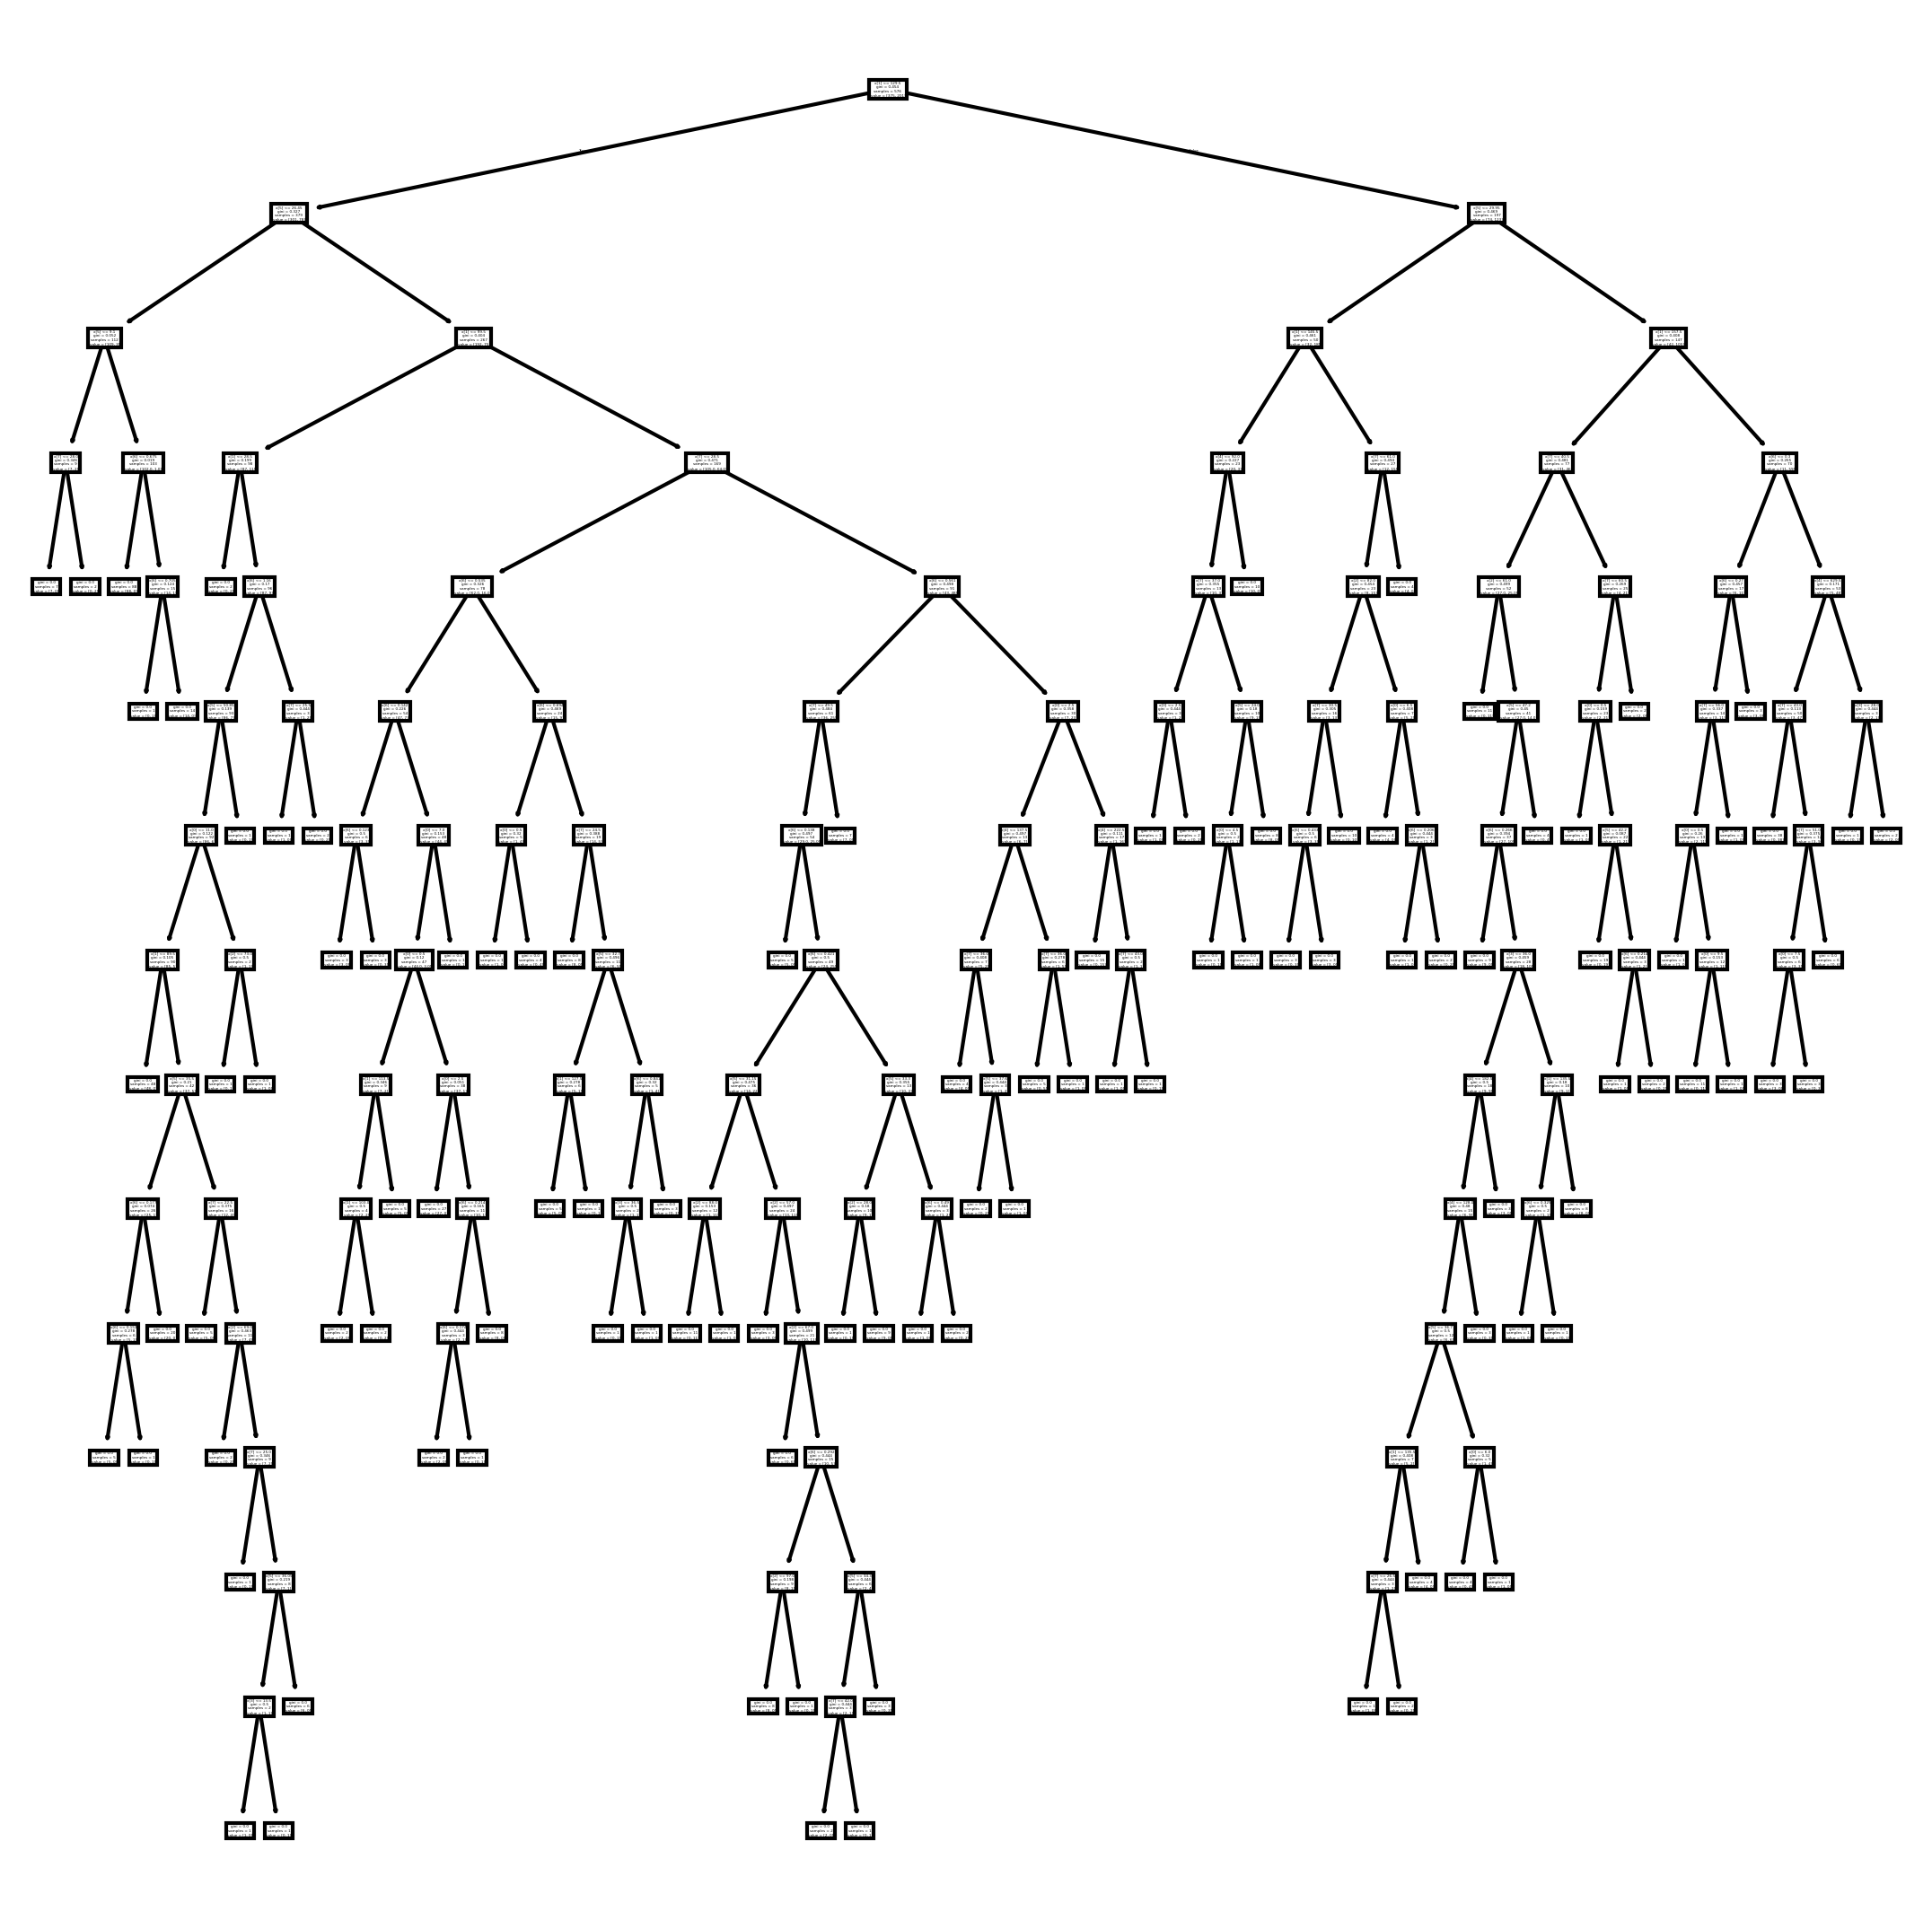

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9), dpi=300)
tree.plot_tree(dt_d)
plt.show()


TASK 13

In [18]:
# KNeighboursClassifier with 4 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [19]:
#confustion matrix
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[112,  13],
       [ 37,  30]])

In [20]:
#classication report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       125
           1       0.70      0.45      0.55        67

    accuracy                           0.74       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.73      0.74      0.72       192



TASK 14

In [21]:
from google.colab import files
uploaded = files.upload()

Saving pm25_2016_2020.csv to pm25_2016_2020.csv


In [22]:
df_w = pd.read_csv('pm25_2016_2020.csv')
df_w.head()

,Unnamed: 0,date_local,latitude_x,longitude_x,elevation,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,arithmetic_mean_a,arithmetic_mean_b
0,0,6/15/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,9.2
1,1,6/18/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,3.9
2,2,6/21/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,6.7
3,3,6/24/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,5.7
4,4,6/30/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.4


latitude_x and longitude_x give the best description for geographical features.

TASK 15

In [24]:
x = df_w[['latitude_x', 'longitude_x']]
x

,latitude_x,longitude_x
0,39.024265,-95.711275
1,39.024265,-95.711275
2,39.024265,-95.711275
3,39.024265,-95.711275
4,39.024265,-95.711275
...,...,...
99995,42.978248,-112.455813
99996,42.978248,-112.455813
99997,42.978248,-112.455813
99998,42.978248,-112.455813


TASK 16

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
x["Clusters"] = kmeans.fit_predict(x)
x["Clusters"] = x["Clusters"].astype("category")
x

<ipython-input-26-05ffefc02baa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Clusters"] = kmeans.fit_predict(x)
<ipython-input-26-05ffefc02baa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Clusters"] = x["Clusters"].astype("category")


,latitude_x,longitude_x,Clusters
0,39.024265,-95.711275,3
1,39.024265,-95.711275,3
2,39.024265,-95.711275,3
3,39.024265,-95.711275,3
4,39.024265,-95.711275,3
...,...,...,...
99995,42.978248,-112.455813,5
99996,42.978248,-112.455813,5
99997,42.978248,-112.455813,5
99998,42.978248,-112.455813,5


TASK 17

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
x["Clusters"] = kmeans.fit_predict(x)
x["Clusters"] = x["Clusters"].astype("category")
x

<ipython-input-27-adc4d51a514b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Clusters"] = kmeans.fit_predict(x)
<ipython-input-27-adc4d51a514b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Clusters"] = x["Clusters"].astype("category")


,latitude_x,longitude_x,Clusters
0,39.024265,-95.711275,2
1,39.024265,-95.711275,2
2,39.024265,-95.711275,2
3,39.024265,-95.711275,2
4,39.024265,-95.711275,2
...,...,...,...
99995,42.978248,-112.455813,1
99996,42.978248,-112.455813,1
99997,42.978248,-112.455813,1
99998,42.978248,-112.455813,1


In [28]:
x["Clusters"].value_counts()

,count
Clusters,
4,27690
1,26656
0,24518
3,14003
2,7133


TASK 18

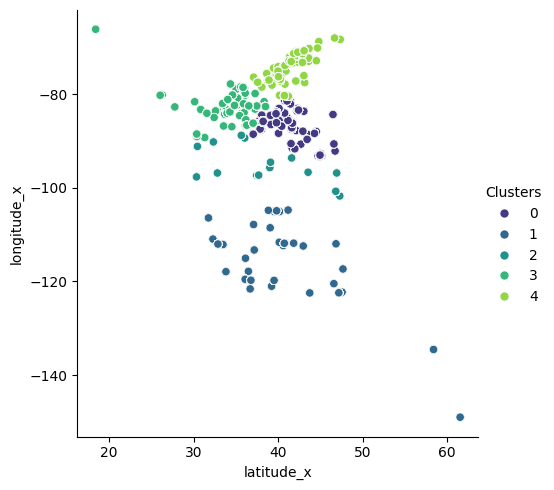

In [29]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.relplot(x='latitude_x',y='longitude_x',hue='Clusters',data=x,palette='viridis')